训练集第 1 次误差： 199654.355991
训练集第 2 次误差： 191011.193694
训练集第 3 次误差： 182804.002799
训练集第 4 次误差： 175010.630142
训练集第 5 次误差： 167610.04931
训练集第 6 次误差： 160582.303313
训练集第 7 次误差： 153908.450179
训练集第 8 次误差： 147570.511316
测试集第 1 次误差： 86592.4259148
测试集第 2 次误差： 82538.4888148
测试集第 3 次误差： 78696.1737579
测试集第 4 次误差： 75054.5469127
测试集第 5 次误差： 71603.2353534
测试集第 6 次误差： 68332.3983953
测试集第 7 次误差： 65232.7003923
测试集第 8 次误差： 62295.2849215

w= [-1.0746391274625267, -0.78747387856637863, -0.34502018509874066, -0.88884963212441503, -0.42274620795562706, 0.16227601354617827, 0.30660644747550775, -0.54330357603097423, -0.42563050862502932, -0.30248810904994206, 0.11647441260319669, 0.97712541747820592, -0.60236011264650846, 0.0] after 8 times


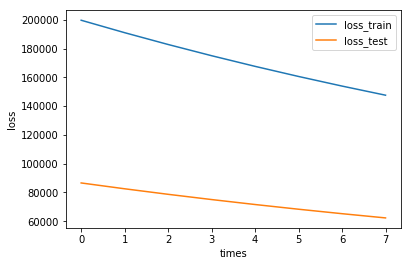

In [10]:
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline


#读取数据
def get_data():
    data = load_svmlight_file("Desktop//housing_scale.txt")
    return data[0], data[1]


#切分数据
x, y = get_data()
row=x.shape[0]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


#初始化为0，设置学习率和梯度下降次数
w =[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
w0=0
learning_rate=0.01
num=8
loss_train_group=[]
loss_test_group=[]


#计算测试集上的方差
def test_loss():
    test_fx=[0 for i in range(167)]
    for i in range(0,167):
        for j in range(0,13):
            test_fx[i]+=w[j]*x_test[i,j]
        test_fx[i]+=w0;
    sum=0;
    for i in range(167):
        sum+=(test_fx[i]-y_test[i])*(test_fx[i]-y_test[i])
    return sum;

#计算训练集上的方差
def train_loss():
    train_fx=[0 for i in range(339)]
    for i in range(0,339):
        for j in range(0,13):
            train_fx[i]+=w[j]*x_train[i,j]
        train_fx[i]+=w0;
    sum=0;
    for i in range(339):
        sum+=(train_fx[i]-y_train[i])*(train_fx[i]-y_train[i])
    return sum;

#梯度下降算法
def gradient_descent():
    mylist =[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
    for i in range(339):
        temp_1=0
        temp_2=0       
        for j in range(13):
            temp_1+=w[j]*x_train[i,j]
        temp_2=y_train[i]-temp_1
        for k in range(13):
            mylist[k]+=x_train[i,k]*temp_2
    for m in range(13):
        mylist[m]/=row
        w[m]=w[m]-(-learning_rate*mylist[m])
    

#执行梯度下降
def optimizer():
    for i in range(num):
        gradient_descent()
        loss_train_group.append(train_loss())
        loss_test_group.append(test_loss())
    for i in range(num):
         print("训练集第",i+1,"次误差：",loss_train_group[i])
    for i in range(num):
         print("测试集第",i+1,"次误差：",loss_test_group[i])
    print()
    
        
#主函数   
def main():
    optimizer()
    #画出图表
    n = np.arange(num)
    print("w=",w,"after 8 times")
    plt.plot(n,loss_train_group,label='loss_train')
    plt.plot(n,loss_test_group,label='loss_test')
    plt.legend(loc='upper right')
    plt.xlabel('times')
    plt.ylabel('loss')

main()






      